In [1]:
#!pip install --upgrade pip

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
#!pip install matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
#!pip3 install scipy

In [4]:
#!pip3 install -U scikit-learn scipy matplotlib

In [5]:
import os
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, precision_score, recall_score

In [6]:
notebook_name = '5_classes_EfficientNetV2B1_96x96_bs_256_weighted'

In [7]:
train_dir = r'/home/pgl-020/Documents/Sentiment_Analysis/FER data/Data/train'
val_dir = r'/home/pgl-020/Documents/Sentiment_Analysis/FER data/Data/validation'
test_dir = r'/home/pgl-020/Documents/Sentiment_Analysis/FER data/Data/test'

In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.08,
    height_shift_range=0.08,
    zoom_range=0.05,
    shear_range=np.rad2deg(np.arctan(0.05)),  # used to set the value by fraction instead of an angle
    horizontal_flip=True,
    fill_mode='reflect',
)

In [9]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

target_size = (96, 96)
interpolation = 'bilinear'
color_mode = 'grayscale'
batch_size = 32

In [10]:
train_generator = train_datagen.flow_from_directory(
    
    directory=train_dir,
    target_size=target_size,
    interpolation=interpolation,
    color_mode=color_mode,
    batch_size=batch_size,
)

Found 15425 images belonging to 5 classes.


In [11]:
val_generator = test_datagen.flow_from_directory(
    
    directory=val_dir,
    target_size=target_size,
    interpolation=interpolation,
    color_mode=color_mode,
    batch_size=batch_size,
)

Found 4613 images belonging to 5 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(
    
    directory=test_dir,
    target_size=target_size,
    interpolation=interpolation,
    color_mode=color_mode,
    batch_size=batch_size,
)

Found 4688 images belonging to 5 classes.


In [13]:
labels = ['angry','happy','neutral','sad','surprise' ]

In [14]:
#!pip3 install scipy

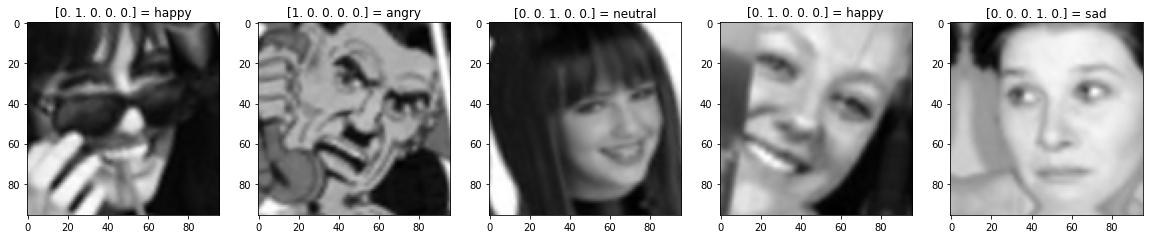

In [15]:
data = next(train_generator)

plt.figure(figsize=[20, 20])

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.title(f'{data[1][i]} = {labels[np.argmax(data[1][i])]}')
    plt.imshow(data[0][i], cmap='gray')

plt.show()

In [16]:
model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(
    input_shape=(96, 96, 1),
    weights=None,
    classes=5,
)

In [17]:
model.summary()

Model: "efficientnetv2-b1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 96, 96, 1)    0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 48, 48, 32)   288         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 48, 48, 32)   128         ['stem_conv[0][0]']              
                                                                                  

                                                                                                  
 block2c_drop (Dropout)         (None, 24, 24, 32)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_add (Add)              (None, 24, 24, 32)   0           ['block2c_drop[0][0]',           
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block3a_expand_conv (Conv2D)   (None, 12, 12, 128)  36864       ['block2c_add[0][0]']            
                                                                                                  
 block3a_expand_bn (BatchNormal  (None, 12, 12, 128)  512        ['block3a_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block4a_se_excite (Multiply)   (None, 6, 6, 192)    0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_project_conv (Conv2D)  (None, 6, 6, 96)     18432       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 6, 6, 96)    384         ['block4a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, 6, 6, 384)    36864       ['block4a_project_bn[0][0]']     
          

                                                                                                  
 block4c_add (Add)              (None, 6, 6, 96)     0           ['block4c_drop[0][0]',           
                                                                  'block4b_add[0][0]']            
                                                                                                  
 block4d_expand_conv (Conv2D)   (None, 6, 6, 384)    36864       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 6, 6, 384)   1536        ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4d_expand_activation (Act  (None, 6, 6, 384)   0           ['block4d_expand_bn[0][0]']      
 ivation) 

 ivation)                                                                                         
                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 6, 6, 672)   6048        ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 6, 6, 672)   2688        ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_activation (Activation  (None, 6, 6, 672)   0           ['block5b_bn[0][0]']             
 )                                                                                                
          

 block5d_bn (BatchNormalization  (None, 6, 6, 672)   2688        ['block5d_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5d_activation (Activation  (None, 6, 6, 672)   0           ['block5d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 672)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5d_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block5d_se_squeeze[0][0]']     
          

                                                                                                  
 block5f_se_squeeze (GlobalAver  (None, 672)         0           ['block5f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5f_se_reshape (Reshape)   (None, 1, 1, 672)    0           ['block5f_se_squeeze[0][0]']     
                                                                                                  
 block5f_se_reduce (Conv2D)     (None, 1, 1, 28)     18844       ['block5f_se_reshape[0][0]']     
                                                                                                  
 block5f_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5f_se_reduce[0][0]']      
                                                                                                  
 block5f_s

 block6b_se_excite (Multiply)   (None, 3, 3, 1152)   0           ['block6b_activation[0][0]',     
                                                                  'block6b_se_expand[0][0]']      
                                                                                                  
 block6b_project_conv (Conv2D)  (None, 3, 3, 192)    221184      ['block6b_se_excite[0][0]']      
                                                                                                  
 block6b_project_bn (BatchNorma  (None, 3, 3, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 3, 3, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_a

 block6d_project_bn (BatchNorma  (None, 3, 3, 192)   768         ['block6d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6d_drop (Dropout)         (None, 3, 3, 192)    0           ['block6d_project_bn[0][0]']     
                                                                                                  
 block6d_add (Add)              (None, 3, 3, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block6e_expand_conv (Conv2D)   (None, 3, 3, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block6e_e

 block6f_add (Add)              (None, 3, 3, 192)    0           ['block6f_drop[0][0]',           
                                                                  'block6e_add[0][0]']            
                                                                                                  
 block6g_expand_conv (Conv2D)   (None, 3, 3, 1152)   221184      ['block6f_add[0][0]']            
                                                                                                  
 block6g_expand_bn (BatchNormal  (None, 3, 3, 1152)  4608        ['block6g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6g_expand_activation (Act  (None, 3, 3, 1152)  0           ['block6g_expand_bn[0][0]']      
 ivation)                                                                                         
          

 block6i_expand_bn (BatchNormal  (None, 3, 3, 1152)  4608        ['block6i_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6i_expand_activation (Act  (None, 3, 3, 1152)  0           ['block6i_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6i_dwconv2 (DepthwiseConv  (None, 3, 3, 1152)  10368       ['block6i_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6i_bn (BatchNormalization  (None, 3, 3, 1152)  4608        ['block6i_dwconv2[0][0]']        
 )        

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
  )

In [19]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.1,
    patience=10,
    verbose=2,
)

In [20]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=0,
    patience=20,
    restore_best_weights=True,
    verbose=2,
)

In [21]:
#C:\Users\avinash.rabhadia\FER\models

In [22]:
min_loss_callback = tf.keras.callbacks.ModelCheckpoint(
    #f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/{notebook_name}/min_loss.h5',
    f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/min_loss.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=2,
)

In [23]:
max_accuracy_callback = tf.keras.callbacks.ModelCheckpoint(
    #f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/{notebook_name}/max_accuracy.h5',
    f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/max_accuracy.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=2,
)

In [24]:
max_precision_callback = tf.keras.callbacks.ModelCheckpoint(
    #f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/{notebook_name}/max_precision.h5',
    f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/max_precision.h5',
    monitor='val_precision',
    mode='max',
    save_best_only=True,
    verbose=2,
)

In [25]:
max_recall_callback = tf.keras.callbacks.ModelCheckpoint(
    #f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/{notebook_name}/max_recall.h5',
    f'/home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/max_recall.h5',
    monitor='val_recall',
    mode='max',
    save_best_only=True,
    verbose=2,
)

In [26]:
class_weights = {
    0: 1.0,
    1: 1.0,
    2: 0.6,
    3: 1.0,
    4: 1.0,
}

In [27]:
fit_history = model.fit(
    train_generator,
    epochs=300,
    validation_data=val_generator,
    class_weight=class_weights,
    callbacks=[
        lr_callback,
        early_stop_callback,
        min_loss_callback,
        max_accuracy_callback,
        max_precision_callback,
        max_recall_callback,
    ],
    verbose=2,
)

Epoch 1/300

Epoch 1: val_loss improved from inf to 1.80661, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/min_loss.h5

Epoch 1: val_accuracy improved from -inf to 0.20572, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_accuracy.h5

Epoch 1: val_precision improved from -inf to 0.00000, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_precision.h5

Epoch 1: val_recall improved from -inf to 0.00000, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_recall.h5
483/483 - 328s - loss: 2.1691 - accuracy: 0.2016 - precision: 0.1921 - recall: 0.0358 - val_loss: 1.8066 - val_accuracy: 0.2057 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0100 - 328s/epoch - 679ms/step
Epo


Epoch 11: val_accuracy did not improve from 0.56362

Epoch 11: val_precision did not improve from 0.81395

Epoch 11: val_recall improved from 0.35920 to 0.38500, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_recall.h5
483/483 - 180s - loss: 1.0187 - accuracy: 0.5221 - precision: 0.6905 - recall: 0.3440 - val_loss: 1.0784 - val_accuracy: 0.5439 - val_precision: 0.6870 - val_recall: 0.3850 - lr: 0.0100 - 180s/epoch - 373ms/step
Epoch 12/300

Epoch 12: val_loss did not improve from 1.07836

Epoch 12: val_accuracy did not improve from 0.56362

Epoch 12: val_precision did not improve from 0.81395

Epoch 12: val_recall improved from 0.38500 to 0.40689, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_recall.h5
483/483 - 180s - loss: 0.9988 - accuracy: 0.5351 - precision: 0.6946 - recall: 0.3557 - val_loss: 1.1141 - val_accuracy: 0.5


Epoch 24: val_precision did not improve from 0.81395

Epoch 24: val_recall improved from 0.51463 to 0.54520, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_recall.h5
483/483 - 180s - loss: 0.8247 - accuracy: 0.6250 - precision: 0.7420 - recall: 0.4956 - val_loss: 0.9115 - val_accuracy: 0.6521 - val_precision: 0.7320 - val_recall: 0.5452 - lr: 0.0100 - 180s/epoch - 373ms/step
Epoch 25/300

Epoch 25: val_loss improved from 0.90449 to 0.88802, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/min_loss.h5

Epoch 25: val_accuracy did not improve from 0.65207

Epoch 25: val_precision did not improve from 0.81395

Epoch 25: val_recall did not improve from 0.54520
483/483 - 180s - loss: 0.8192 - accuracy: 0.6324 - precision: 0.7352 - recall: 0.5089 - val_loss: 0.8880 - val_accuracy: 0.6512 - val_precision: 0.7547 - val_recall: 0.5170 - lr: 

Epoch 39/300

Epoch 39: val_loss did not improve from 0.82442

Epoch 39: val_accuracy improved from 0.67505 to 0.68069, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_accuracy.h5

Epoch 39: val_precision did not improve from 0.81395

Epoch 39: val_recall improved from 0.57815 to 0.59051, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_recall.h5
483/483 - 180s - loss: 0.7317 - accuracy: 0.6766 - precision: 0.7635 - recall: 0.5771 - val_loss: 0.8360 - val_accuracy: 0.6807 - val_precision: 0.7562 - val_recall: 0.5905 - lr: 0.0100 - 180s/epoch - 373ms/step
Epoch 40/300

Epoch 40: val_loss did not improve from 0.82442

Epoch 40: val_accuracy did not improve from 0.68069

Epoch 40: val_precision did not improve from 0.81395

Epoch 40: val_recall did not improve from 0.59051
483/483 - 179s - loss: 0.7232 - accuracy: 0.6795 - precision

Epoch 55/300

Epoch 55: val_loss did not improve from 0.80373

Epoch 55: val_accuracy did not improve from 0.68675

Epoch 55: val_precision did not improve from 0.81395

Epoch 55: val_recall did not improve from 0.60850
483/483 - 179s - loss: 0.6651 - accuracy: 0.7051 - precision: 0.7822 - recall: 0.6208 - val_loss: 0.8469 - val_accuracy: 0.6813 - val_precision: 0.7600 - val_recall: 0.5834 - lr: 0.0100 - 179s/epoch - 371ms/step
Epoch 56/300

Epoch 56: val_loss did not improve from 0.80373

Epoch 56: val_accuracy did not improve from 0.68675

Epoch 56: val_precision did not improve from 0.81395

Epoch 56: val_recall did not improve from 0.60850
483/483 - 179s - loss: 0.6592 - accuracy: 0.7120 - precision: 0.7844 - recall: 0.6287 - val_loss: 0.8774 - val_accuracy: 0.6777 - val_precision: 0.7451 - val_recall: 0.5987 - lr: 0.0100 - 179s/epoch - 371ms/step
Epoch 57/300

Epoch 57: val_loss did not improve from 0.80373

Epoch 57: val_accuracy did not improve from 0.68675

Epoch 57: val_precis

Epoch 71/300

Epoch 71: val_loss did not improve from 0.77577

Epoch 71: val_accuracy did not improve from 0.70930

Epoch 71: val_precision did not improve from 0.81395

Epoch 71: val_recall did not improve from 0.64188
483/483 - 179s - loss: 0.6104 - accuracy: 0.7316 - precision: 0.7928 - recall: 0.6625 - val_loss: 0.8337 - val_accuracy: 0.6943 - val_precision: 0.7568 - val_recall: 0.6131 - lr: 0.0100 - 179s/epoch - 371ms/step
Epoch 72/300

Epoch 72: val_loss did not improve from 0.77577

Epoch 72: val_accuracy did not improve from 0.70930

Epoch 72: val_precision did not improve from 0.81395

Epoch 72: val_recall did not improve from 0.64188
483/483 - 179s - loss: 0.6137 - accuracy: 0.7305 - precision: 0.7972 - recall: 0.6584 - val_loss: 0.9546 - val_accuracy: 0.6636 - val_precision: 0.7310 - val_recall: 0.5814 - lr: 0.0100 - 179s/epoch - 371ms/step
Epoch 73/300

Epoch 73: val_loss did not improve from 0.77577

Epoch 73: val_accuracy did not improve from 0.70930

Epoch 73: val_precis

483/483 - 179s - loss: 0.4877 - accuracy: 0.7842 - precision: 0.8334 - recall: 0.7305 - val_loss: 0.7674 - val_accuracy: 0.7199 - val_precision: 0.7640 - val_recall: 0.6750 - lr: 1.0000e-03 - 179s/epoch - 372ms/step
Epoch 86/300

Epoch 86: val_loss did not improve from 0.75399

Epoch 86: val_accuracy improved from 0.72231 to 0.72643, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_accuracy.h5

Epoch 86: val_precision did not improve from 0.81395

Epoch 86: val_recall improved from 0.67505 to 0.68112, saving model to /home/pgl-020/Documents/Sentiment_Analysis/FER/data/models/5_classes_EfficientNetV2B1_96x96_bs_256_weighted/max_recall.h5
483/483 - 180s - loss: 0.4827 - accuracy: 0.7852 - precision: 0.8356 - recall: 0.7364 - val_loss: 0.7624 - val_accuracy: 0.7264 - val_precision: 0.7635 - val_recall: 0.6811 - lr: 1.0000e-03 - 180s/epoch - 373ms/step
Epoch 87/300

Epoch 87: val_loss did not improve from 0.7539

Epoch 102: early stopping


In [28]:
def draw_graphics(fit_history, metric_name):
    history = fit_history.history
    
    metric = history[metric_name]
    val_metric = history[f'val_{metric_name}']
    
    epochs = range(1, len(metric) + 1)

    plt.plot(epochs, metric, 'b', label=f'Training {metric_name}')
    plt.plot(epochs, val_metric, 'r', label=f'Validation {metric_name}')
    
    plt.title(f'Training and validation {metric_name}')
    plt.xlabel('epochs')
    plt.ylabel(f'{metric_name}')
    plt.legend()
    plt.show()

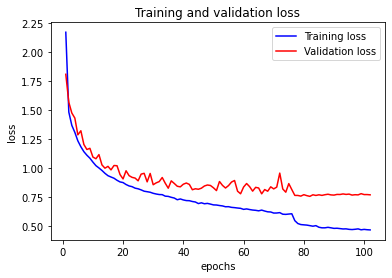

In [29]:
draw_graphics(fit_history, 'loss')

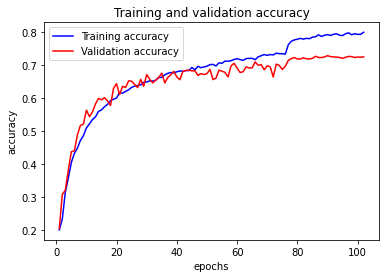

In [30]:
draw_graphics(fit_history, 'accuracy')

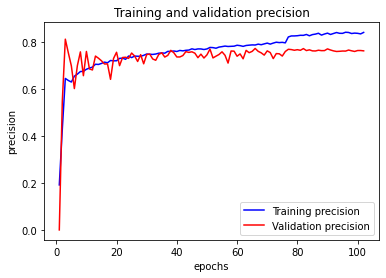

In [31]:
draw_graphics(fit_history, 'precision')

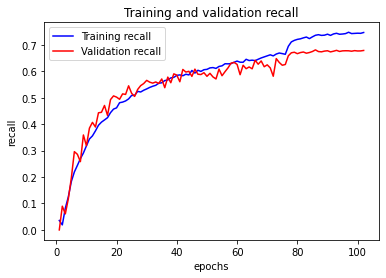

In [32]:
draw_graphics(fit_history, 'recall')